
# OT for domain adaptation

This example introduces a domain adaptation in a 2D setting and the 4 OTDA
approaches currently supported in POT.


In [2]:
# Authors: Laetitia Chapel & Felipe Tobar
#
# Modified from POT documentation example by
# - Remi Flamary <remi.flamary@unice.fr>
# - Stanislas Chambon <stan.chambon@gmail.com>
# License: MIT License
# Original: https://pythonot.github.io/auto_examples/domain-adaptation/plot_otda_classes.html#ot-for-domain-adaptation
# Original: https://pythonot.github.io/auto_examples/domain-adaptation/plot_otda_d2.html

import matplotlib.pylab as pl
import ot
import ot.plot
from cycler import cycler
pl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

## Generate data



In [3]:
n_source_samples = 150
n_target_samples = 150

Xs, ys = ot.datasets.make_data_classif('3gauss', n_source_samples)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_target_samples)

## Instantiate the different transport algorithms and fit them



In [4]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xs)

## Fig 1 : plots source and target samples



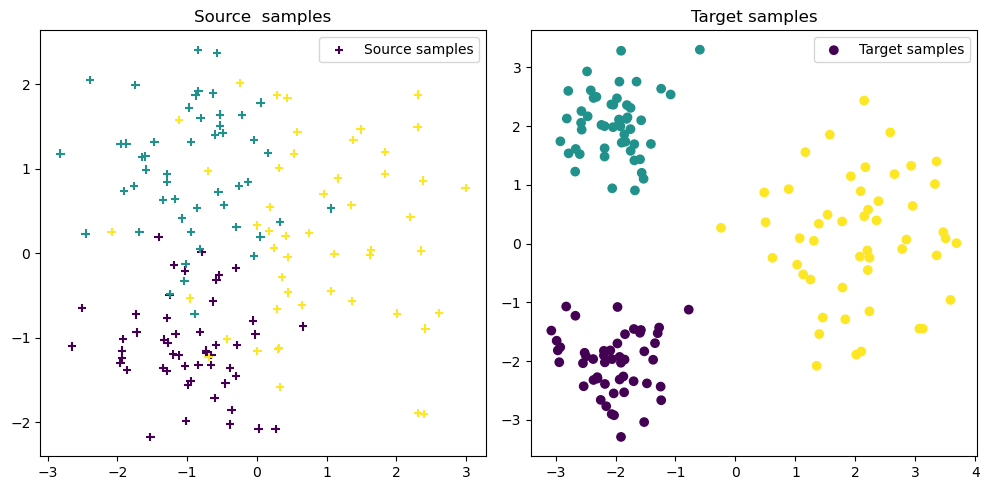

In [5]:
pl.figure(1, figsize=(10, 5))
pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
#pl.xticks([])
#pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
#pl.xticks([])
#pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')
pl.tight_layout()

#pl.savefig('../img/DA_original_samples.pdf')

## Fig 2 : plot optimal couplings and transported samples



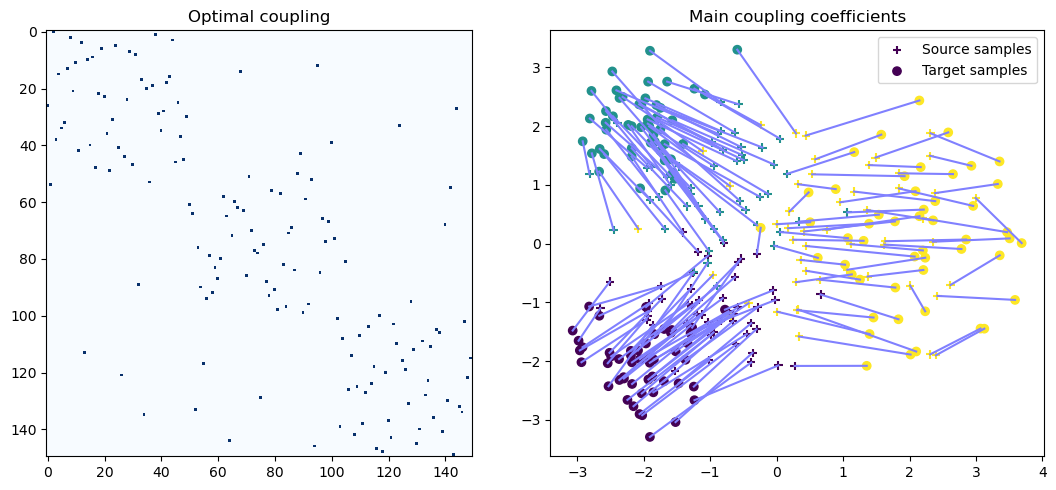

In [6]:
param_img = {'interpolation': 'nearest'}

pl.figure(2, figsize=(11, 5))

pl.subplot(1, 2,  1)
pl.imshow(ot_emd.coupling_, **param_img, cmap='Blues')
#pl.xticks([])
#pl.yticks([])
pl.title('Optimal coupling')



pl.subplot(1, 2,  2)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_emd.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
#pl.xticks([])
#pl.yticks([])
pl.title('Main coupling coefficients')
pl.legend(loc=0)

pl.tight_layout()
#pl.savefig('../img/DA_coupling.pdf')




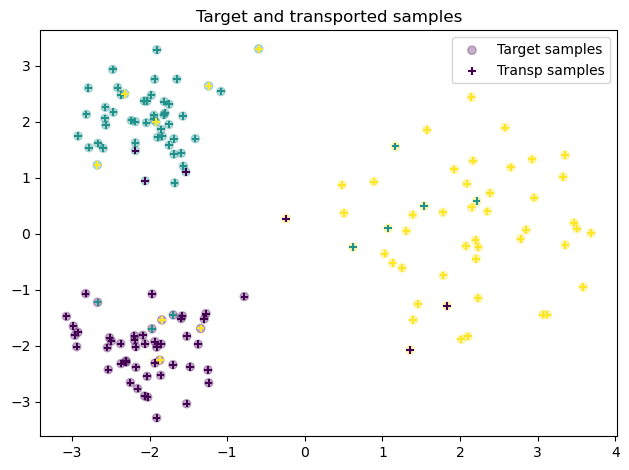

In [7]:

pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
#pl.xticks([])
#pl.yticks([])
pl.title('Target and transported samples')
pl.legend(loc="upper right")

pl.tight_layout()
#pl.savefig('../img/DA_samples.pdf')
